In [30]:
import datetime, time

import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

from sklearn.model_selection import GridSearchCV

from IPython.display import clear_output, display, HTML

In [31]:
# Ignore warning
import warnings
warnings.filterwarnings('ignore')

In [32]:
pd.set_option('display.max_columns', None)  # or 1000
pd.set_option('display.max_rows', None)  # or 1000
pd.set_option('display.max_colwidth', -1)  # or 199

In [33]:
train = pd.read_csv("train_preprocessed.csv")
test = pd.read_csv("test_preprocessed.csv")
all_data = pd.read_csv("all_data_preprocessed.csv")

In [34]:
train_X = train.loc[:, train.columns != 'totals_totalTransactionRevenue']
train_y = train['totals_totalTransactionRevenue']

In [35]:
test_X = test.loc[:, test.columns != 'totals_totalTransactionRevenue']
test_y = test['totals_totalTransactionRevenue']

In [36]:
all_data_X = all_data.loc[:, all_data.columns != 'totals_totalTransactionRevenue']
all_data_y = all_data['totals_totalTransactionRevenue']

In [37]:
parameters = {
    'fit_intercept': [True, False],
    'normalize': [True, False]
}

for key, values in parameters.items():
    print(key,"\t- ", values)

fit_intercept 	-  [True, False]
normalize 	-  [True, False]


In [38]:
start = time.time()

gridSearchResult = GridSearchCV(LinearRegression(),
                                parameters, 
                                cv = 5, 
                                scoring='neg_mean_squared_error', 
                                verbose=5
                               ).fit(all_data_X, all_data_y)

clear_output()

end = time.time()
hours, rem = divmod(end-start, 3600)
minutes, seconds = divmod(rem, 60)
print("Time Taken: {:0>2}:{:0>2}:{:05.3f}".format(int(hours),int(minutes),seconds))

Time Taken: 00:00:37.291


In [39]:
# Show all results
results_df = pd.DataFrame.from_dict(gridSearchResult.cv_results_)
results_df.T

,0,1,2,3
mean_fit_time,2.07601,1.1948,1.0702,1.0534
std_fit_time,1.19563,0.136029,0.0668776,0.0598986
mean_score_time,0.0899992,0.0650018,0.0645999,0.0752003
std_score_time,0.041618,0.00952828,0.00976919,0.012319
param_fit_intercept,True,True,False,False
param_normalize,True,False,True,False
params,"{'fit_intercept': True, 'normalize': True}","{'fit_intercept': True, 'normalize': False}","{'fit_intercept': False, 'normalize': True}","{'fit_intercept': False, 'normalize': False}"
split0_test_score,-1.78653e+14,-1.78653e+14,-1.78665e+14,-1.78665e+14
split1_test_score,-9.84718e+14,-9.84718e+14,-9.84759e+14,-9.84759e+14
split2_test_score,-6.32943e+14,-6.32943e+14,-6.33003e+14,-6.33003e+14


In [40]:
# Results with rank 1
rank_one = results_df[results_df['rank_test_score'] == 1][['params', 'mean_fit_time', 'std_fit_time', 'mean_train_score', 'std_train_score', 'mean_test_score', 'std_test_score']]
rank_one = pd.concat([rank_one['params'].apply(pd.Series), rank_one], axis = 1, sort=True).drop(columns = 'params')
rank_one.T

,1
fit_intercept,True
normalize,False
mean_fit_time,1.1948
std_fit_time,0.136029
mean_train_score,-9.41896e+14
std_train_score,2.14111e+14
mean_test_score,-1.01523e+15
std_test_score,8.71677e+14


In [41]:
gridSearchResult.best_estimator_

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [46]:
start = time.time()

LR = gridSearchResult.best_estimator_.fit(train_X, train_y)

end = time.time()
hours, rem = divmod(end-start, 3600)
minutes, seconds = divmod(rem, 60)
time_taken = "{:0>2}:{:0>2}:{:05.3f}".format(int(hours),int(minutes),seconds)

In [47]:
predictions = pd.Series(LR.predict(test_X))

In [48]:
print("Mean Squared Error:", mean_squared_error(test_y, predictions)**0.5)
print("Time Taken to Fit:", time_taken)

Mean Squared Error: 23852897.244986977
Time Taken to Fit: 00:00:1.075


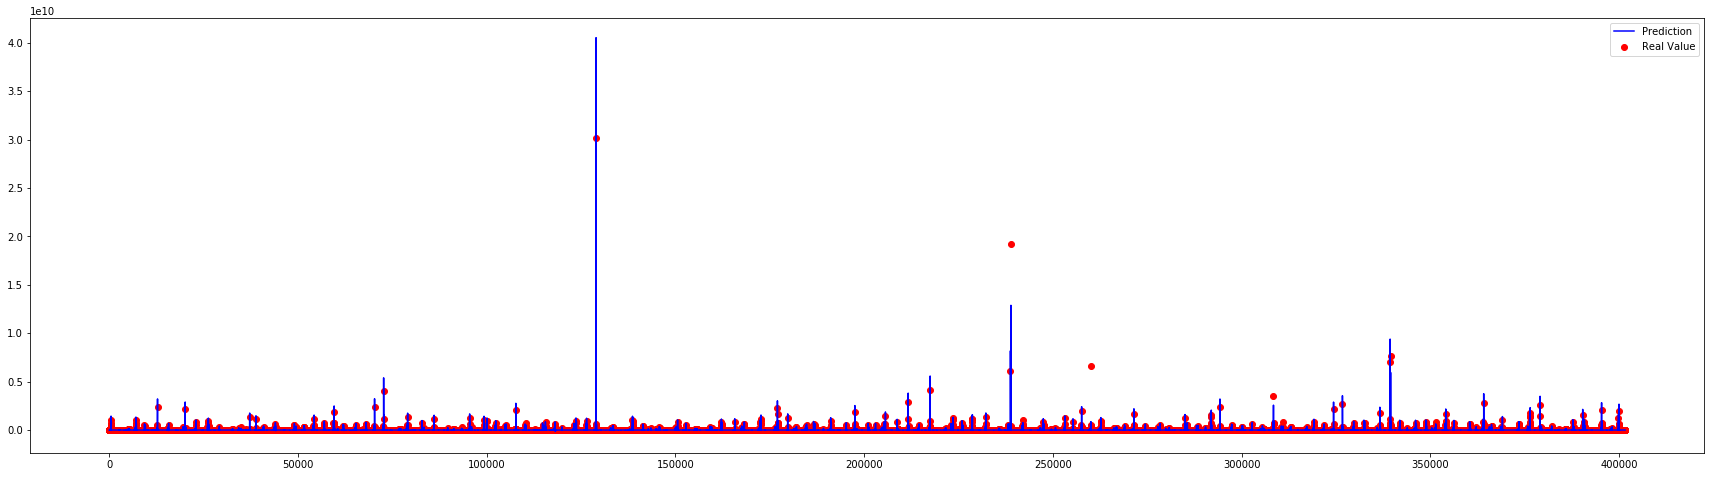

In [49]:
fig = plt.figure(figsize=(30,8))
ax = plt.axes()

ax.plot(predictions.index, predictions, color = 'blue', label='Prediction')
ax.scatter(test_y.index, test_y, color = 'red', label='Real Value')

ax.legend(loc='best')
plt.show()